In [25]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt


labels = os.listdir('../fashion_mnist_images/train')
print(labels)
files = os.listdir('../fashion_mnist_images/train/0')
print(files[:10])
print(len(files))

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
['0000.png', '0001.png', '0002.png', '0003.png', '0004.png', '0005.png', '0006.png', '0007.png', '0008.png', '0009.png']
6000


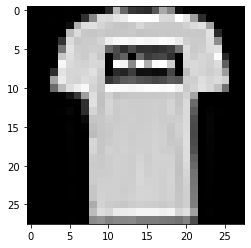

In [26]:

imageData = cv2.imread('../fashion_mnist_images/train/0/0000.png', cv2.IMREAD_UNCHANGED)
np.set_printoptions(linewidth=200)
plt.imshow(imageData)
plt.show()